In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [2]:

df=pd.read_csv(r'D:\Training\Python Classes\Linear Regression\data.csv')

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>],
       [<Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>],
       [<Axes: title={'center': 'yr_renovated'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

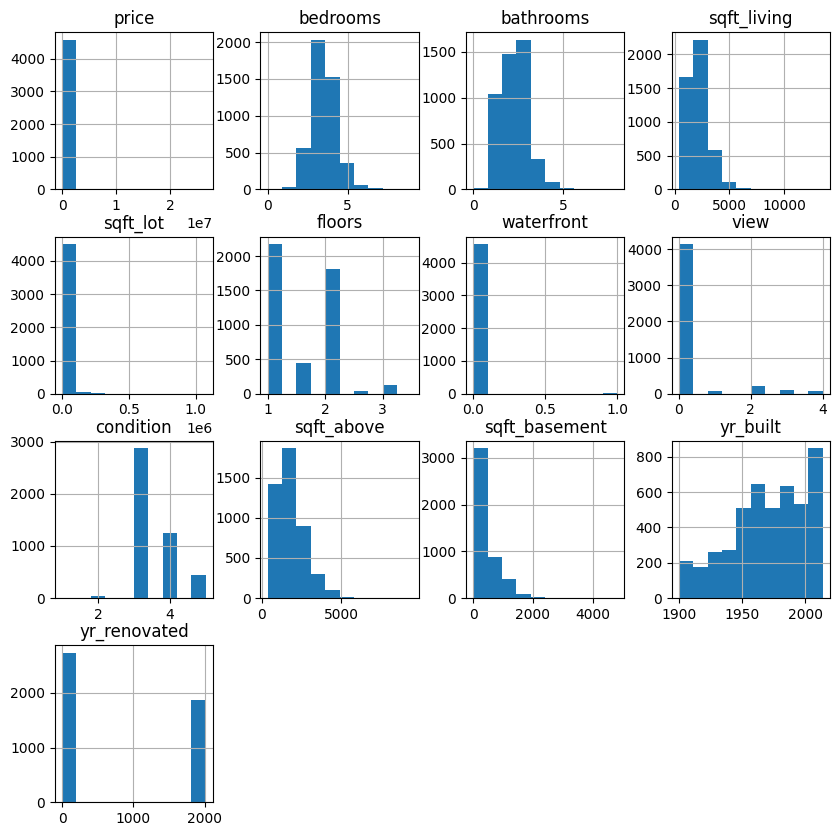

In [3]:
df.hist(figsize=(10,10))

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the city column
df['city'] = label_encoder.fit_transform(df['city'])
df['statezip'] = label_encoder.fit_transform(df['statezip'])
df['street'] = label_encoder.fit_transform(df['street'])
# Display the dataframe
display(df)


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,1522,36,62,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,3899,35,58,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2291,18,26,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4263,3,7,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,4352,31,31,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,3447,35,62,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,960,3,6,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,4033,32,37,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,3498,35,71,USA


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   int32  
 15  city           4600 non-null   int32  
 16  statezip       4600 non-null   int32  
 17  country        4600 non-null   object 
dtypes: float

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
X = df.drop(columns=['price','floors','waterfront','date','country','street','city','statezip','yr_built','yr_renovated','condition','sqft_lot'])
y = df['price']

In [110]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
combined_feature = pca.fit_transform(df[['sqft_basement', 'sqft_above']])
X['pca_feature'] = combined_feature


<Axes: >

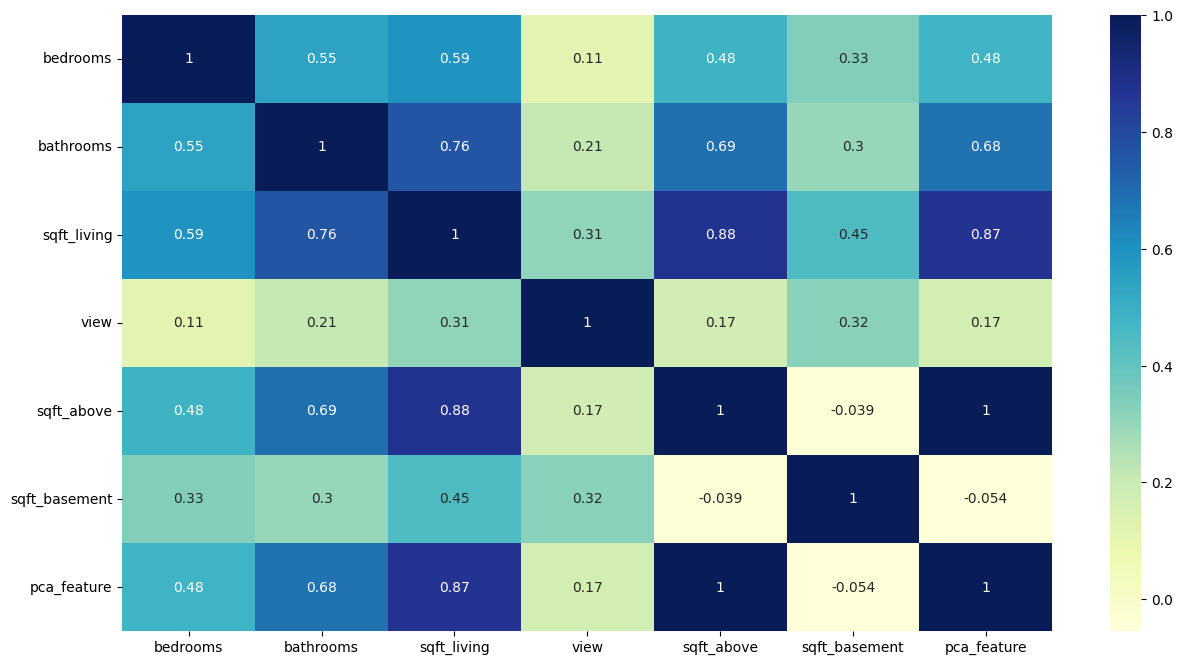

In [111]:
plt.figure(figsize=(15,8))
sns.heatmap(X.corr(),annot=True,  cmap="YlGnBu")

In [112]:
X['view'].replace(0, 0.240652, inplace=True)
X['sqft_basement'].replace(0, 312.081522, inplace=True)

In [113]:
display(X)
display(y)


,bedrooms,bathrooms,sqft_living,view,sqft_above,sqft_basement,pca_feature
0,3.0,1.50,1340,0.240652,1340,312.081522,-477.907440
1,5.0,2.50,3650,4.000000,3370,280.000000,1543.012007
2,3.0,2.00,1930,0.240652,1930,312.081522,111.838996
3,3.0,2.25,2000,0.240652,1000,1000.000000,-847.076041
4,4.0,2.50,1940,0.240652,1140,800.000000,-701.273264
...,...,...,...,...,...,...,...
4595,3.0,1.75,1510,0.240652,1510,312.081522,-307.980501
4596,3.0,2.50,1460,0.240652,1460,312.081522,-357.959012
4597,3.0,2.50,3010,0.240652,3010,312.081522,1191.374846
4598,4.0,2.00,2090,0.240652,1070,1020.000000,-777.692419


0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64

In [ ]:

# Normalize the numeric columns
scaler = MinMaxScaler()

# Fit and transform the data
X_norm = scaler.fit_transform(X)

# Convert the numpy array back to a DataFrame for better readability
X_normalized_df = pd.DataFrame(X_norm, columns=X.columns)

# Print the first few rows of the normalized data
print(X_normalized_df.head())

In [ ]:
import matplotlib.pyplot as plt
x=df['sqft_lot']
y=df['price']
plt.scatter(x,y)

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
display(X_train,X_test)
display(y)

,bedrooms,bathrooms,sqft_living,view,sqft_above,sqft_basement,pca_feature
1898,4.0,2.50,2770,0.240652,2770,312.081522,951.477990
1370,4.0,3.00,3720,0.240652,3720,312.081522,1901.069710
3038,4.0,2.50,2810,0.240652,2810,312.081522,991.460800
2361,4.0,3.75,4030,0.240652,4030,312.081522,2210.936482
156,3.0,2.00,2000,0.240652,2000,312.081522,181.808912
...,...,...,...,...,...,...,...
4426,3.0,1.00,1180,0.240652,1180,312.081522,-637.838677
466,4.0,2.00,2520,0.240652,1400,1120.000000,-450.765715
3092,3.0,1.00,1150,0.240652,990,160.000000,-832.447377
3772,2.0,1.00,910,0.240652,910,312.081522,-907.722640


,bedrooms,bathrooms,sqft_living,view,sqft_above,sqft_basement,pca_feature
3683,3.0,2.50,1460,0.240652,1180,280.000000,-646.046799
4411,5.0,2.25,2000,0.240652,1300,700.000000,-538.410555
2584,3.0,3.25,2940,3.000000,2440,500.000000,606.962453
69,3.0,2.50,2200,0.240652,1570,630.000000,-266.474562
1844,3.0,2.50,1720,0.240652,1000,720.000000,-838.867919
...,...,...,...,...,...,...,...
1612,3.0,1.75,1700,0.240652,1460,240.000000,-364.994546
1068,5.0,2.00,1930,0.240652,1930,312.081522,111.838996
4350,3.0,2.00,1180,0.240652,1180,312.081522,-637.838677
3027,4.0,2.50,2370,0.240652,2370,312.081522,551.649898


0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64

In [117]:
model=LinearRegression()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
display(y_pred, y_test)
mse=mean_squared_error(y_test, y_pred)
r2= r2_score(y_test,y_pred)

print(f'Mean_squared_error: {mse}')

print(f'R_squared: {r2}')

print(f'm: {model.coef_}')
print(f'c: {model.intercept_}')
print(model.score(X_test, y_test))


array([ 375376.60120322,  411320.30092503, 1006663.66365189,
        580540.93558374,  444367.3813217 ,  677499.67300784,
        499045.27982842,  471738.20718197,  466633.83264062,
        477908.43350779,  736158.40166826,  431843.02807145,
        790245.68167955,  495104.35083332,  388753.17396037,
        811015.46684784,  639791.36840507,  694387.26991407,
       1050020.97682484,  917084.94143523, 1027327.49352041,
        652131.82105671,  623627.14754343,  449189.00544763,
        231417.38331769,  218389.98401819,  677475.36861332,
        773333.7803788 ,  374635.61848188,  892288.15892323,
       1612073.42206678,  364895.72352403, 1193087.77829991,
        473515.31000882,  199927.91382978,  445628.18305578,
        829706.78471465,  809523.37469936,  280424.59318216,
        584459.91145916,  412522.2482348 ,  363385.32200924,
        455892.15766569,  421793.73658311,  296270.64269845,
        310363.89378241,  504831.64405708,  446934.17944716,
        715386.30276076,

3683      544000.0
4411           0.0
2584     1712500.0
69        365000.0
1844      275000.0
           ...    
1612      750000.0
1068      230000.0
4350    26590000.0
3027      687000.0
3455      289659.0
Name: price, Length: 920, dtype: float64

Mean_squared_error: 989062494372.4974
R_squared: 0.030184788143508445
m: [-5.63486999e+04 -2.13170357e+03  3.59232778e+02  7.89580259e+04
 -3.29521119e+01 -8.84297247e+01 -4.44347412e+01]
c: 41207.589741731936
0.030184788143508445


In [61]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore

# Sample data creation (replace this with your actual data loading)

df=pd.read_csv('D:/Training/Python Classes/Linear Regression/data.csv')

# Encode categorical columns
label_encoder = LabelEncoder()
df['city'] = label_encoder.fit_transform(df['city'])
df['statezip'] = label_encoder.fit_transform(df['statezip'])
df['street'] = label_encoder.fit_transform(df['street'])

# Drop unnecessary columns
X = df.drop(columns=['price', 'date', 'country', 'floors', 'waterfront', 'yr_renovated', 'condition', 'view', 'sqft_basement'])
y = df['price']

# Apply log transformation to the target variable
y_log = np.log1p(y)

# Calculate VIF
X_with_constant = np.append(np.ones((X.shape[0], 1)), X, axis=1)
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X_with_constant, i + 1) for i in range(X.shape[1])]

print(vif)

# Normalize the numeric columns
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

# Convert the numpy array back to a DataFrame for better readability
X_normalized_df = pd.DataFrame(X_norm, columns=X.columns)

# Removing outliers using Z-score
z_scores = np.abs(zscore(X_normalized_df))
outliers = (z_scores > 3).any(axis=1)
X_normalized_df_no_outliers = X_normalized_df[~outliers]
y_log_no_outliers = y_log[~outliers]

# Adding polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_normalized_df_no_outliers)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y_log_no_outliers, test_size=0.2, random_state=42)

# Create and train the model using GridSearchCV for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best model from GridSearchCV
best_model = grid_search.best_estimator_

# Predict and evaluate
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Transform predictions back to the original scale
y_pred_orig_scale = np.expm1(y_pred)
y_test_orig_scale = np.expm1(y_test)

mse_orig_scale = mean_squared_error(y_test_orig_scale, y_pred_orig_scale)
r2_orig_scale = r2_score(y_test_orig_scale, y_pred_orig_scale)

print(f'Mean Squared Error (Original Scale): {mse_orig_scale}')
print(f'R Squared (Original Scale): {r2_orig_scale}')


     variables       VIF
0     bedrooms  1.659513
1    bathrooms  2.988080
2  sqft_living  6.565114
3     sqft_lot  1.072404
4   sqft_above  4.985104
5     yr_built  1.595757
6       street  1.022020
7         city  1.921574
8     statezip  2.089122
Mean Squared Error (Original Scale): 252533050065.2671
R Squared (Original Scale): 0.013125582981622474
